<a href="https://www.kaggle.com/code/ironman45/mask-detection?scriptVersionId=162889693" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1017.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/4803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/5106.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3765.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/780.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/3952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/227.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/2731.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/579.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/353.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/Wi

In [2]:
import os
os.listdir('/kaggle/input')

['face-mask-12k-images-dataset', 'mask-video', 'face-mask-dataset']

In [3]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization 
from tensorflow.keras.models import Sequential 
import matplotlib.pyplot as plt

data=tf.keras.utils.image_dataset_from_directory("/kaggle/input/face-mask-dataset/data",batch_size=32) 
data=data.map(lambda x,y:(x/255.0,y))

data_i=data.as_numpy_iterator()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 7553 files belonging to 2 classes.


# Preparing the Dataset for training and validation

In [4]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=32

Train_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
Val_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_gen = Train_Datagen.flow_from_directory(directory = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train', target_size = (256,256), 
                                       batch_size = batch_size, class_mode = 'binary')

val_gen = Val_Datagen.flow_from_directory(directory = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation', target_size = (256,256), 
                                       batch_size = batch_size, class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# Building The CNN model for Mask Detection

In [5]:
model=Sequential()

pretrained_model=tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    
    input_shape=(256,256,3),
    pooling='avg',
)

for layer in pretrained_model.layers:
    layer.trainable=False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24112513 (91.98 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


# Training the model

In [7]:
hist=model.fit(train_gen,epochs=15,validation_data=val_gen)

Epoch 1/15
313/313 [==============================] - 117s 351ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 2/15
313/313 [==============================] - 46s 148ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 3/15
313/313 [==============================] - 45s 142ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0010 - val_accuracy: 0.9987
Epoch 4/15
313/313 [==============================] - 45s 144ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0023 - val_accuracy: 0.9987
Epoch 5/15
313/313 [==============================] - 45s 142ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/15
313/313 [==============================] - 45s 144ms/step - loss: 0.0160 - accuracy: 0.9967 - val_loss: 0.0251 - val_accuracy: 0.9962
Epoch 7/15
313/313 [==============================] - 45s 144ms/step - loss: 0.0096 - accuracy: 0.9981 - val_loss: 0.0085 - val_a

# Plot of Training Loss vs Validation Loss

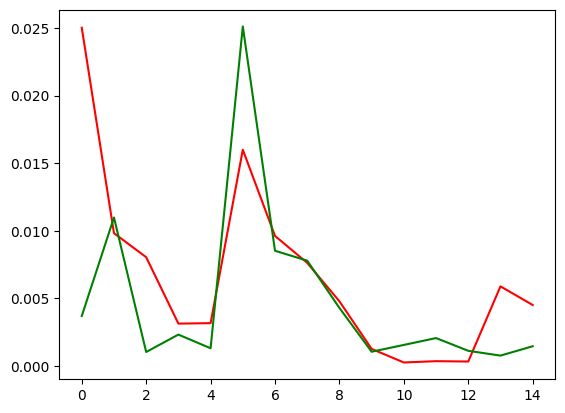

In [8]:
plt.plot(hist.history['loss'],color='red',label='loss');
plt.plot(hist.history['val_loss'],color='green',label='val_loss');


# Plot of Training Accuracy vs Validation Accuracy

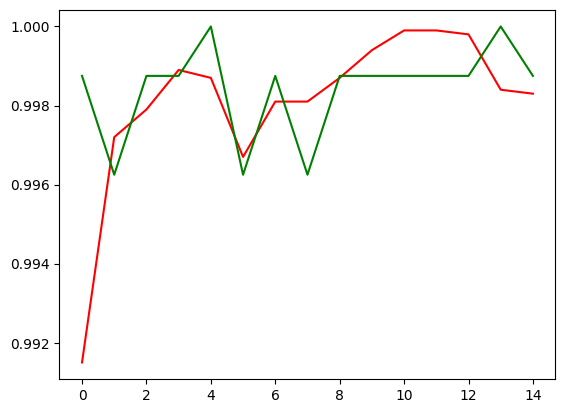

In [9]:
plt.plot(hist.history['accuracy'],color='red',label='loss');
plt.plot(hist.history['val_accuracy'],color='green',label='val_loss');


In [10]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

# Generating Test Data

In [11]:
Test_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

test_gen = Test_Datagen.flow_from_directory(directory = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test', target_size = (256,256), 
                                       batch_size = 32, class_mode = 'binary')



Found 992 images belonging to 2 classes.


In [12]:
for i in range(30):
    batch=test_gen[i]
    x,y=batch
    ypred=model.predict(x)
    pre.update_state(y,ypred)
    re.update_state(y,ypred)
    acc.update_state(y,ypred)
    

1/1 [==============================] - 0s 35ms/step


# Model Accuracy

In [13]:
print(pre.result().numpy())
print(re.result().numpy())
print(acc.result().numpy())

0.99796337
0.99796337
0.99791664


1/1 [==============================] - 0s 22ms/step


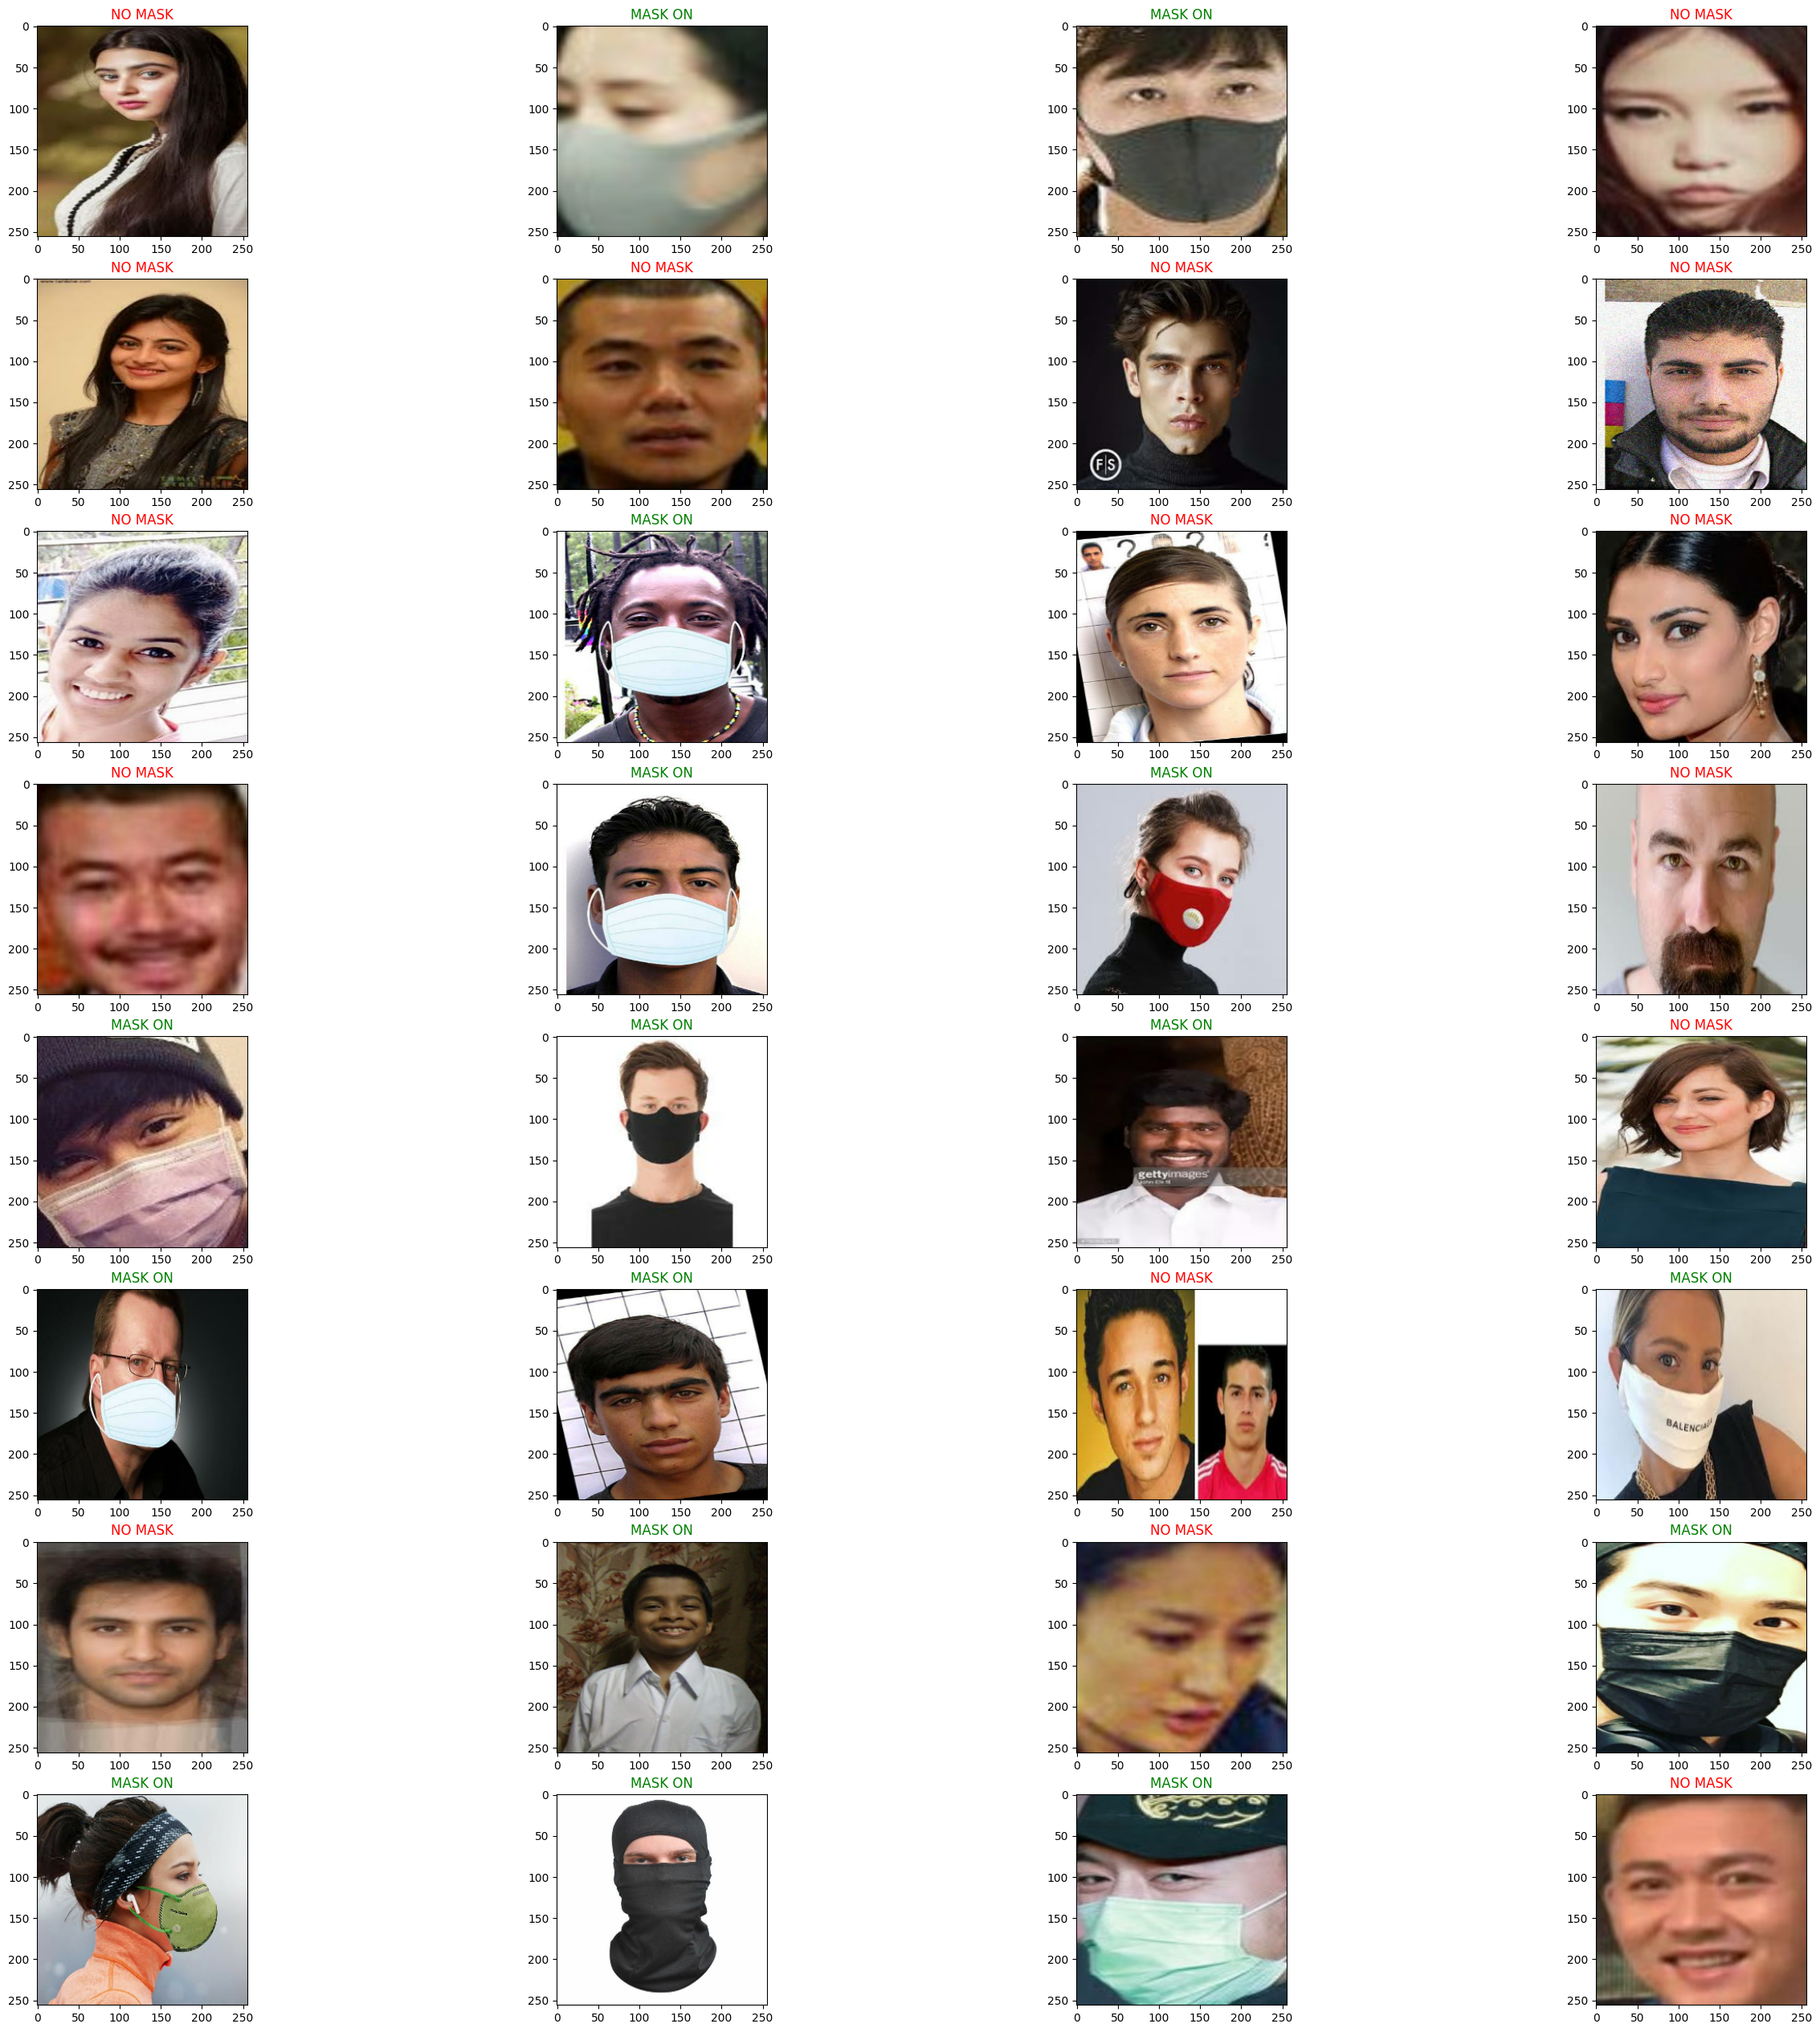

In [14]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
image=data.as_numpy_iterator().next()
X,y=image

fig = plt.figure(figsize=(32,32)) 


for i in range(32):
    fig.add_subplot(8, 4, i+1) 

    plt.imshow((X[i]*255).astype(int))

    my_image = img_to_array(X[i]*255)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)



    pre=model.predict(my_image)
    if(pre<0.5):
        plt.title("MASK ON",color='green') 
    else:
        plt.title("NO MASK",color='red') 

